# Visualizações Avançadas

Este notebook demonstra técnicas avançadas de visualização de dados usando Plotly e outras bibliotecas.

## Objetivos
- Criar gráficos interativos
- Desenvolver dashboards
- Explorar diferentes tipos de visualização
- Personalizar estilos e temas

In [2]:
# Importar bibliotecas
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..', 'src'))

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyo

from data_loader import DataLoader
from visualizer import DataVisualizer

# Configurar plotly para notebooks
pyo.init_notebook_mode(connected=True)

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


## 1. Preparação dos Dados

In [3]:
# Carregar dados
loader = DataLoader(data_dir='../data')
df = loader.load_csv('../data/sample/exemplo_vendas.csv')

# Converter coluna de data
df['data'] = pd.to_datetime(df['data'])

# Criar dados adicionais para demonstração
np.random.seed(42)
n_samples = 200

extended_data = {
    'data': pd.date_range('2023-01-01', periods=n_samples, freq='D'),
    'vendas': np.random.normal(1000, 200, n_samples) + np.sin(np.arange(n_samples) * 0.1) * 100,
    'lucro': np.random.normal(150, 50, n_samples),
    'clientes': np.random.poisson(50, n_samples),
    'categoria': np.random.choice(['Eletrônicos', 'Roupas', 'Casa', 'Livros', 'Esportes'], n_samples),
    'regiao': np.random.choice(['Norte', 'Sul', 'Leste', 'Oeste'], n_samples),
    'vendedor': np.random.choice(['João', 'Maria', 'Pedro', 'Ana', 'Carlos'], n_samples)
}

df_extended = pd.DataFrame(extended_data)
df_extended['margem'] = (df_extended['lucro'] / df_extended['vendas']) * 100

print(f"Dataset estendido criado com {len(df_extended)} registros")
df_extended.head()

INFO:data_loader:CSV carregado com sucesso: ../data/sample/exemplo_vendas.csv
INFO:data_loader:Shape: (10, 7)


Dataset estendido criado com 200 registros


,data,vendas,lucro,clientes,categoria,regiao,vendedor,margem
0,2023-01-01,1099.342831,167.889368,48,Roupas,Norte,João,15.271794
1,2023-01-02,982.330481,178.039226,58,Esportes,Norte,Ana,18.124168
2,2023-01-03,1149.404641,204.152562,49,Eletrônicos,Norte,João,17.761592
3,2023-01-04,1334.157992,202.690103,67,Casa,Oeste,Pedro,15.192361
4,2023-01-05,992.111159,81.116532,44,Roupas,Leste,Pedro,8.176154


## 2. Gráficos Interativos Básicos

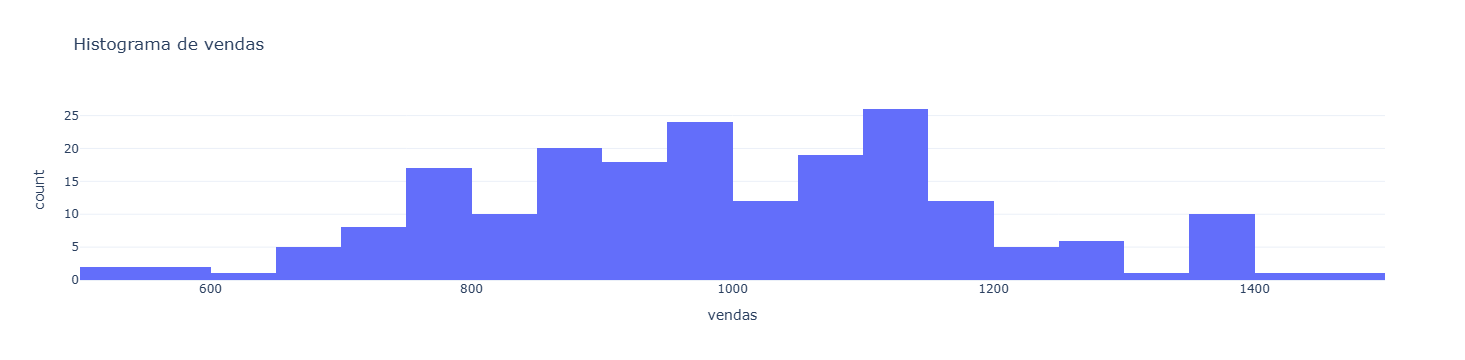

INFO:visualizer:Histograma de vendas plotado


In [4]:
# Inicializar visualizer
viz = DataVisualizer(df_extended)

# Histograma interativo
viz.plot_histogram('vendas', interactive=True, bins=30)

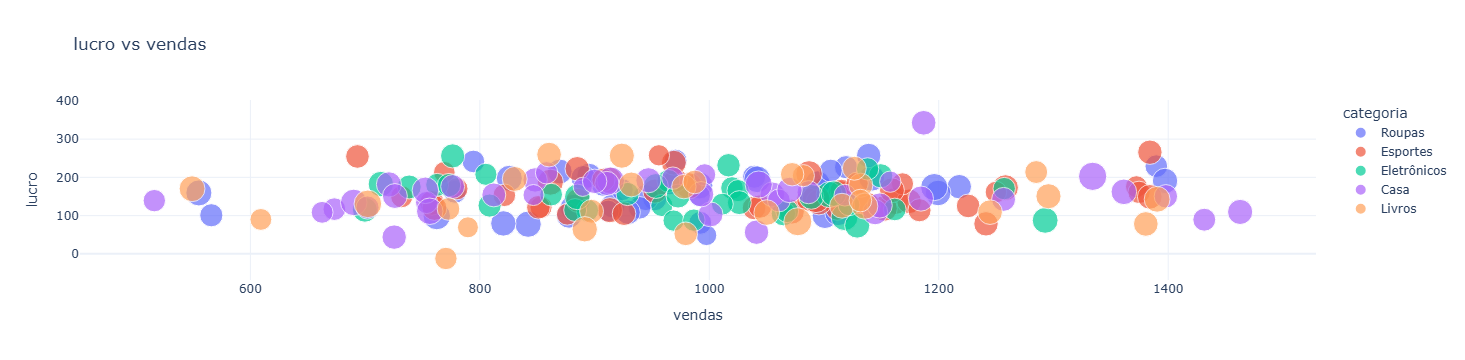

INFO:visualizer:Gráfico de dispersão lucro vs vendas plotado


In [5]:
# Scatter plot interativo com múltiplas dimensões
viz.plot_scatter('vendas', 'lucro', color_col='categoria', size_col='clientes', interactive=True)

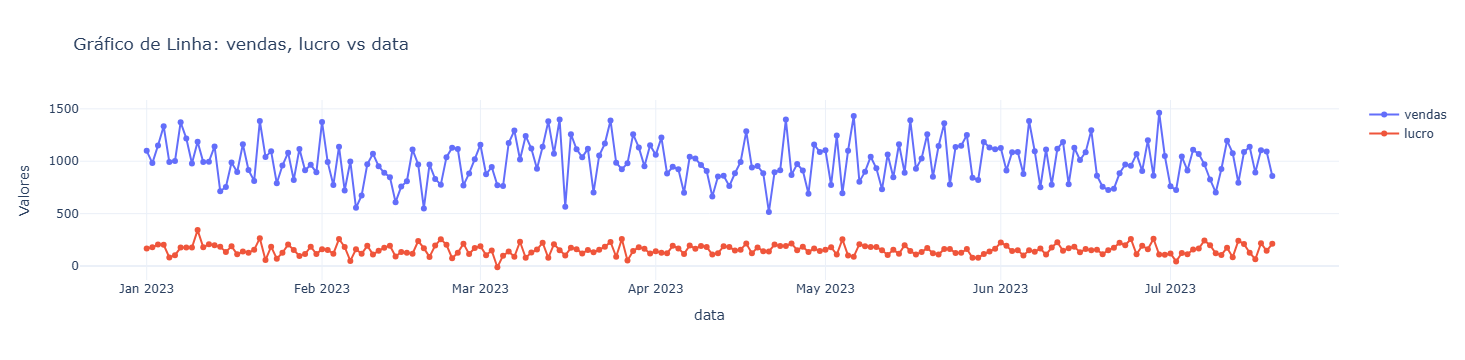

INFO:visualizer:Gráfico de linha plotado


In [6]:
# Série temporal interativa
viz.plot_line_chart('data', ['vendas', 'lucro'], interactive=True)

## 3. Gráficos Avançados com Plotly

In [7]:
# Gráfico de bolhas 3D
fig = px.scatter_3d(df_extended, 
                    x='vendas', y='lucro', z='clientes',
                    color='categoria', size='margem',
                    title='Análise 3D: Vendas, Lucro e Clientes por Categoria',
                    template='plotly_white')

fig.update_layout(scene=dict(
    xaxis_title='Vendas (R$)',
    yaxis_title='Lucro (R$)',
    zaxis_title='Número de Clientes'
))

fig.show()

ValueError: 
    Invalid element(s) received for the 'size' property of scatter3d.marker
        Invalid elements include: [-1.5658086958579829]

    The 'size' property is a number and may be specified as:
      - An int or float in the interval [0, inf]
      - A tuple, list, or one-dimensional numpy array of the above

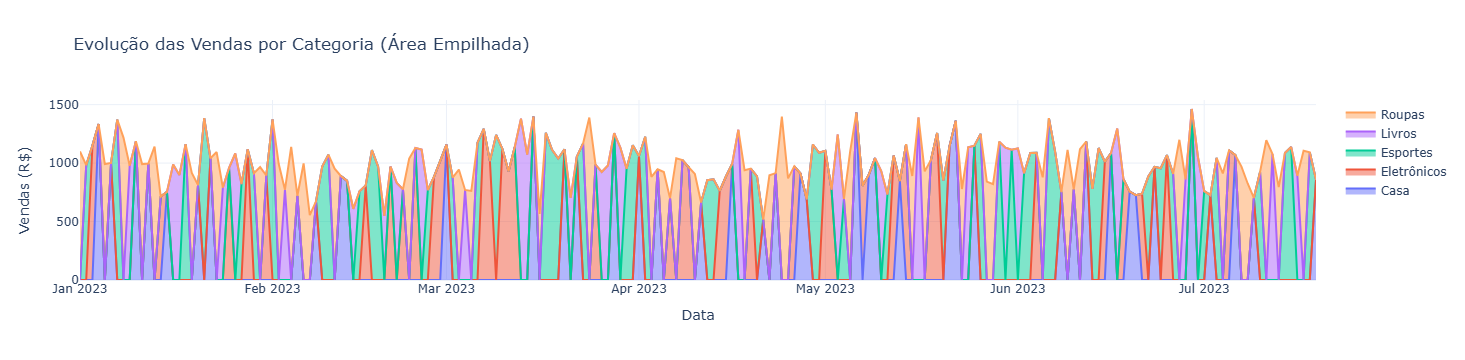

In [8]:
# Gráfico de área empilhada
df_grouped = df_extended.groupby(['data', 'categoria'])['vendas'].sum().reset_index()
df_pivot = df_grouped.pivot(index='data', columns='categoria', values='vendas').fillna(0)

fig = go.Figure()

for categoria in df_pivot.columns:
    fig.add_trace(go.Scatter(
        x=df_pivot.index,
        y=df_pivot[categoria],
        mode='lines',
        stackgroup='one',
        name=categoria
    ))

fig.update_layout(
    title='Evolução das Vendas por Categoria (Área Empilhada)',
    xaxis_title='Data',
    yaxis_title='Vendas (R$)',
    template='plotly_white'
)

fig.show()

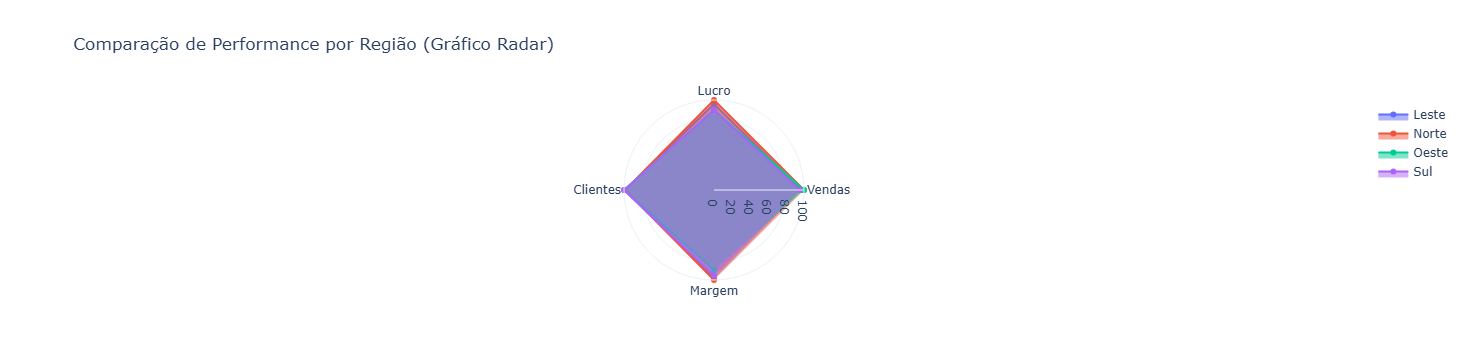

In [9]:
# Gráfico de radar (spider chart)
# Calcular métricas por região
metrics_by_region = df_extended.groupby('regiao').agg({
    'vendas': 'mean',
    'lucro': 'mean',
    'clientes': 'mean',
    'margem': 'mean'
}).reset_index()

# Normalizar valores para escala 0-100
for col in ['vendas', 'lucro', 'clientes', 'margem']:
    metrics_by_region[f'{col}_norm'] = (metrics_by_region[col] / metrics_by_region[col].max()) * 100

fig = go.Figure()

for region in metrics_by_region['regiao']:
    region_data = metrics_by_region[metrics_by_region['regiao'] == region]
    
    fig.add_trace(go.Scatterpolar(
        r=[region_data['vendas_norm'].iloc[0], 
           region_data['lucro_norm'].iloc[0],
           region_data['clientes_norm'].iloc[0], 
           region_data['margem_norm'].iloc[0]],
        theta=['Vendas', 'Lucro', 'Clientes', 'Margem'],
        fill='toself',
        name=region
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 100]
        )
    ),
    title='Comparação de Performance por Região (Gráfico Radar)',
    template='plotly_white'
)

fig.show()

## 4. Dashboard Interativo

In [ ]:
# Criar dashboard completo
viz.create_dashboard(save_html=True, filename='../dashboard_vendas.html')

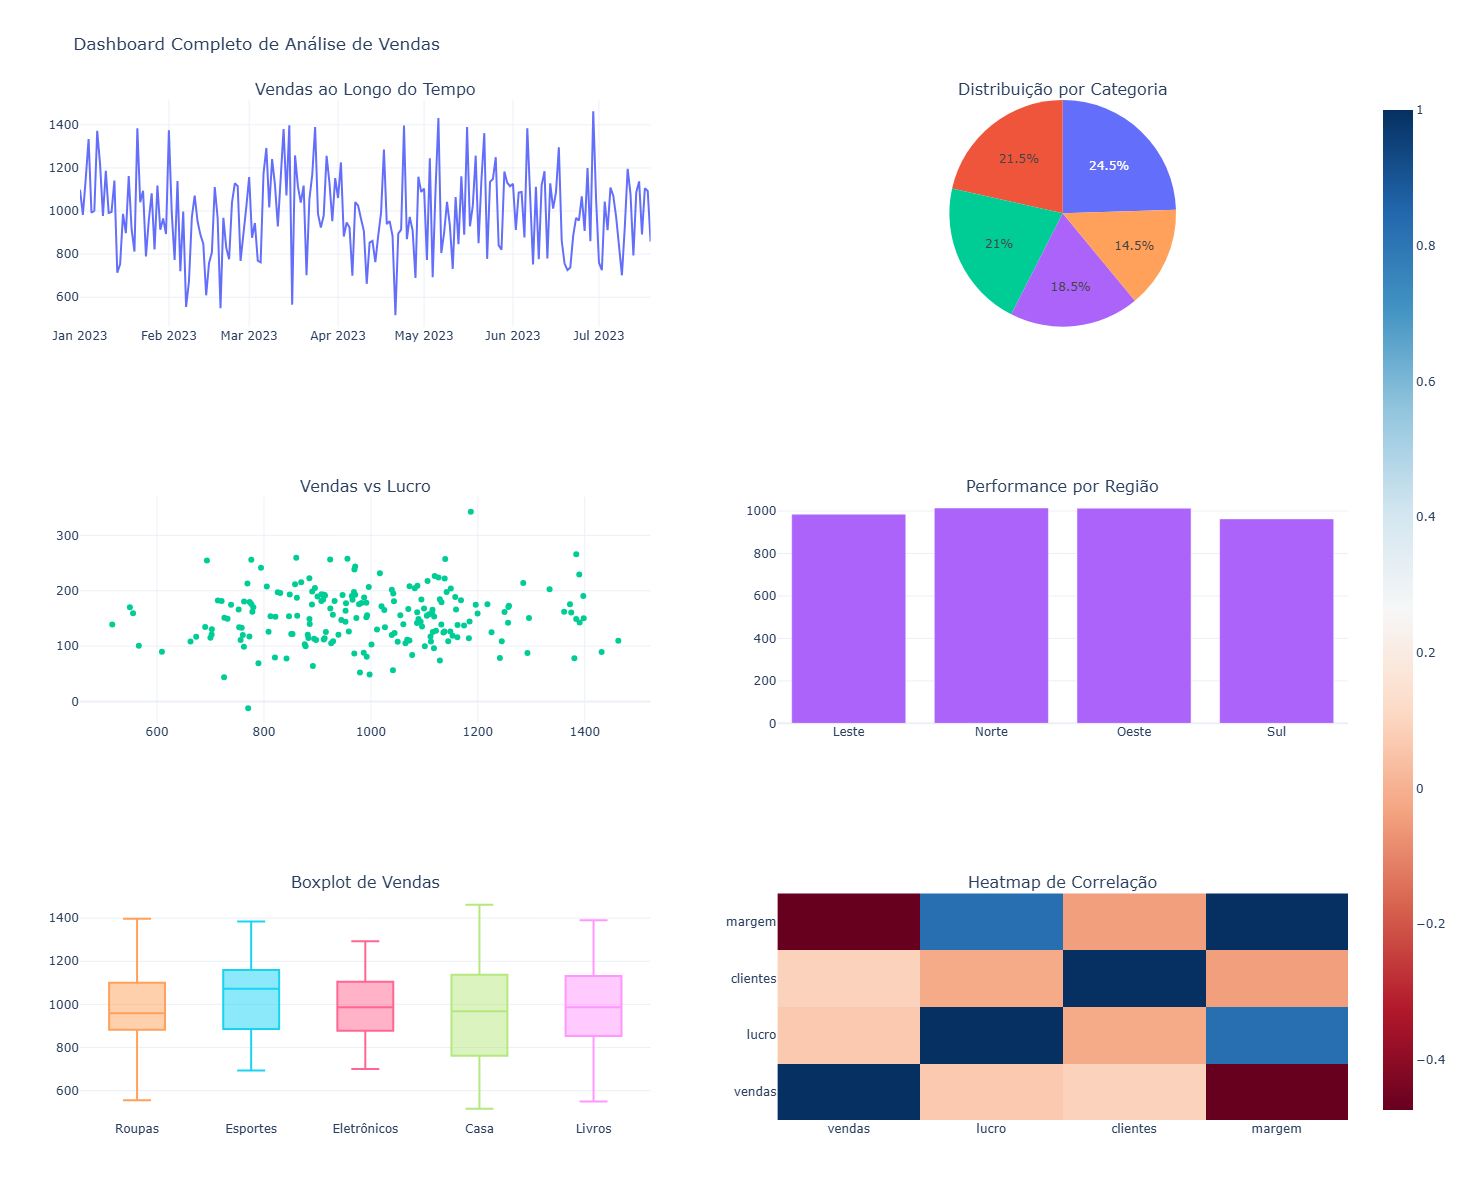

In [10]:
# Dashboard personalizado com múltiplos gráficos
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=(
        'Vendas ao Longo do Tempo', 'Distribuição por Categoria',
        'Vendas vs Lucro', 'Performance por Região',
        'Boxplot de Vendas', 'Heatmap de Correlação'
    ),
    specs=[
        [{"secondary_y": False}, {"type": "pie"}],
        [{"secondary_y": False}, {"type": "bar"}],
        [{"type": "box"}, {"type": "heatmap"}]
    ]
)

# 1. Série temporal de vendas
fig.add_trace(
    go.Scatter(x=df_extended['data'], y=df_extended['vendas'], 
               mode='lines', name='Vendas'),
    row=1, col=1
)

# 2. Gráfico de pizza por categoria
categoria_counts = df_extended['categoria'].value_counts()
fig.add_trace(
    go.Pie(labels=categoria_counts.index, values=categoria_counts.values, name='Categoria'),
    row=1, col=2
)

# 3. Scatter plot vendas vs lucro
fig.add_trace(
    go.Scatter(x=df_extended['vendas'], y=df_extended['lucro'], 
               mode='markers', name='Vendas vs Lucro'),
    row=2, col=1
)

# 4. Barras por região
regiao_vendas = df_extended.groupby('regiao')['vendas'].mean()
fig.add_trace(
    go.Bar(x=regiao_vendas.index, y=regiao_vendas.values, name='Vendas por Região'),
    row=2, col=2
)

# 5. Boxplot de vendas por categoria
for categoria in df_extended['categoria'].unique():
    categoria_data = df_extended[df_extended['categoria'] == categoria]['vendas']
    fig.add_trace(
        go.Box(y=categoria_data, name=categoria),
        row=3, col=1
    )

# 6. Heatmap de correlação
corr_matrix = df_extended[['vendas', 'lucro', 'clientes', 'margem']].corr()
fig.add_trace(
    go.Heatmap(z=corr_matrix.values, 
               x=corr_matrix.columns, 
               y=corr_matrix.columns,
               colorscale='RdBu'),
    row=3, col=2
)

# Atualizar layout
fig.update_layout(
    title_text="Dashboard Completo de Análise de Vendas",
    showlegend=False,
    height=1200,
    template='plotly_white'
)

fig.show()

## 5. Gráficos com Animação

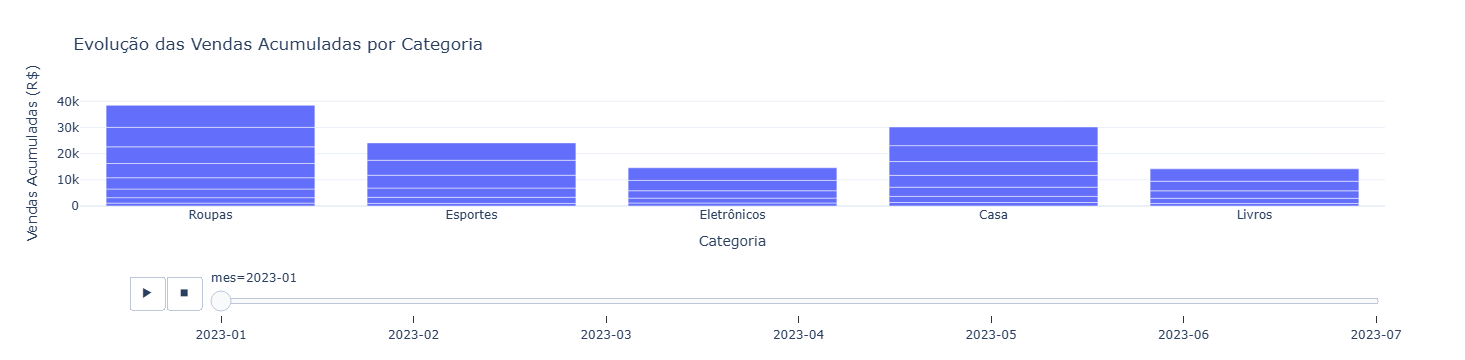

In [11]:
# Criar dados para animação (vendas acumuladas ao longo do tempo)
df_extended_sorted = df_extended.sort_values('data')
df_extended_sorted['vendas_acum'] = df_extended_sorted.groupby('categoria')['vendas'].cumsum()
df_extended_sorted['mes'] = df_extended_sorted['data'].dt.to_period('M').astype(str)

# Gráfico animado de barras
fig = px.bar(df_extended_sorted, 
             x='categoria', y='vendas_acum', 
             animation_frame='mes',
             title='Evolução das Vendas Acumuladas por Categoria',
             template='plotly_white')

fig.update_layout(
    xaxis_title='Categoria',
    yaxis_title='Vendas Acumuladas (R$)'
)

fig.show()

## 6. Personalização Avançada

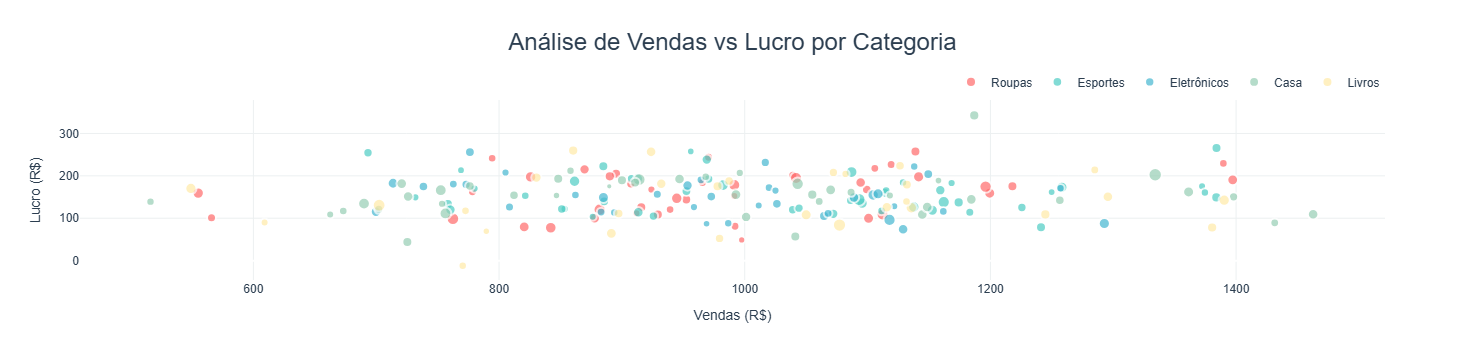

In [12]:
# Gráfico com tema personalizado
custom_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

fig = go.Figure()

# Adicionar traces com cores personalizadas
for i, categoria in enumerate(df_extended['categoria'].unique()):
    categoria_data = df_extended[df_extended['categoria'] == categoria]
    
    fig.add_trace(go.Scatter(
        x=categoria_data['vendas'],
        y=categoria_data['lucro'],
        mode='markers',
        name=categoria,
        marker=dict(
            color=custom_colors[i % len(custom_colors)],
            size=categoria_data['clientes'] / 5,
            opacity=0.7,
            line=dict(width=2, color='white')
        ),
        hovertemplate=
        '<b>%{fullData.name}</b><br>' +
        'Vendas: R$ %{x:,.2f}<br>' +
        'Lucro: R$ %{y:,.2f}<br>' +
        '<extra></extra>'
    ))

# Personalizar layout
fig.update_layout(
    title={
        'text': 'Análise de Vendas vs Lucro por Categoria',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 24, 'color': '#2C3E50'}
    },
    xaxis={
        'title': 'Vendas (R$)',
        'gridcolor': '#ECF0F1',
        'showgrid': True
    },
    yaxis={
        'title': 'Lucro (R$)',
        'gridcolor': '#ECF0F1',
        'showgrid': True
    },
    plot_bgcolor='white',
    paper_bgcolor='white',
    font={'family': 'Arial, sans-serif', 'size': 12, 'color': '#2C3E50'},
    legend={
        'orientation': 'h',
        'yanchor': 'bottom',
        'y': 1.02,
        'xanchor': 'right',
        'x': 1
    }
)

fig.show()

## 7. Exportação e Compartilhamento

In [13]:
# Salvar gráficos em diferentes formatos
fig.write_html("../outputs/grafico_vendas_lucro.html")
fig.write_image("../outputs/grafico_vendas_lucro.png", width=1200, height=800)

print("Gráficos salvos em:")
print("- HTML: ../outputs/grafico_vendas_lucro.html")
print("- PNG: ../outputs/grafico_vendas_lucro.png")

ValueError: 
Image export using the "kaleido" engine requires the Kaleido package,
which can be installed using pip:

    $ pip install --upgrade kaleido


## Conclusões

Este notebook demonstrou:

1. **Gráficos Interativos**: Como criar visualizações que permitem exploração dinâmica dos dados
2. **Dashboards**: Combinação de múltiplos gráficos em uma única visualização
3. **Gráficos Avançados**: 3D, radar, área empilhada e outros tipos especializados
4. **Animações**: Visualizações que mostram mudanças ao longo do tempo
5. **Personalização**: Como customizar cores, temas e estilos
6. **Exportação**: Diferentes formatos para compartilhamento

### Próximos Passos
- Integrar com dados em tempo real
- Criar dashboards web com Dash
- Implementar filtros interativos
- Adicionar análises estatísticas avançadas